IA & Data science (LU3IN0226) -- 2022-2023
--------
*&copy; Equipe pédagogique: Christophe Marsala, Olivier Schwander, Jean-Noël Vittaut.*

# TD-TME07: les arbres de décision (version numérique)

L'objectif de ce notebook est d'implémenter une version de l'algorithme d'apprentissage supervisé par arbre de décision qui travaille sur des données numériques.

**Important**: ce notebook doit être fait après avoir fait le TME-06 (arbres de décision catégoriel).


## Préparation du notebook

<font size="+1" color="RED">**[Q]**</font> **Indiquer dans la boîte ci-dessous vos noms et prénoms :**

BENAHMEND Neil

JARSKI Paul

<font color="RED" size="+1"><b>[Q]</b></font> **Renommer ce fichier ipython**

Tout en haut de cette page, cliquer sur <tt>tme-07</tt> et rajouter à la suite de <tt>tme-07</tt> les noms des membres du binômes séparés par un tiret.

<font color="RED" size="+1">IMPORTANT: soumission de votre fichier final</font>

**Nom à donner au fichier à poster** : *tme-07-Nom1_Nom2.ipynb* 
- *Nom1* et *Nom2* : noms des membres du binôme
- ne pas compresser ou faire une archive: il faut rendre le fichier ipython tel quel, éventuellement, si vous avez d'autres fichiers vous les rendez séparément.

**Echancier pour la soumission de votre compte-rendu:**
- le compte-rendu d'une séance doit être remis obligatoirement <font color="RED">avant la séance suivante</font>.

**Le compte-rendu est soumis sur la page Moodle.**

<font color="RED" size="+1">**[Q]**</font> **Mise à jour de la librairie `iads`**

En premier lieu, vérifier que votre librairie `iads` est bien à jour avec tout ce que vous avez implémenté jusqu'au TME 6.
Les fonctions `entropie()`, `classe_majoritaire()`, et `construit_AD()` et les classes `NoeudCategoriel` et `ClassifierArbreDecision` doivent être mises dans votre fichier `Classifiers.py`.


Une fois à jour, importer la librairie pour pouvoir l'utiliser dans ce notebook.


In [6]:
# Importation des librairies standards:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline  

# Importation de votre librairie iads:
# La ligne suivante permet de préciser le chemin d'accès à la librairie iads
import sys
sys.path.append('../')   # iads doit être dans le répertoire frère du répertoire courant !

# Importation de la librairie iads
import iads as iads

# importation de Classifiers
from iads import Classifiers as cl

# importation de utils
from iads import utils as ut

# importation de evaluation
from iads import evaluation as ev

# commande TRES utile pour recharger automatiquement le code que vous modifiez dans les modules
%load_ext autoreload
%autoreload 2

Afin de réaliser les premiers essais avec les fonctions que l'on va programmer, on charge la base des iris de Fisher que l'on a vue dans le cours 6 (voir aussi par exemple : https://fr.wikipedia.org/wiki/Iris_de_Fisher) dont les exemples sont décrits par 4 variables et sont associés à l'une des 3 classes possibles ('setosa', 'virginica' et 'versicolor'). La classe est donnée dans la colonne 'species' du dataframe chargé de la façon suivante:


Pour nous faciliter le travail, on va passer par la librairie `seaborn` qui contient une fonction nous permettant de récupérer les données des Iris, de plus, cette librairie possède des fonctions de visualisation qui pourront nous être utiles.

Pour la documentation de cette librairie, c'est ici : https://seaborn.pydata.org/index.html

In [7]:
# Importation de la librairie seaborn:
import seaborn as sns

# Le dataset des iris est fourni dans le package seaborn, on l'obtient ainsi:
iris_df = sns.load_dataset('iris')

In [ ]:
# Remarque : si seaborn n'est pas installée sur votre machine, décommenter la ligne suivante, exécuter-là
# et, une fois terminé, recommenter-là.
# Eventuellement, si le proxy doit être utilisé (machine PPTI), revoir le notebook du TME 1

# pip install --user -U seaborn

**Remarque**: si vous ne pouvez pas installer la librairie `seaborn`, les données iris sont fournies dans le répertoire `data`.

In [8]:
print("Version de python et des librairies utilisées :")
print("python: ",sys.version)
print("pandas: ",pd.__version__)
print("numpy: ",np.__version__)
print("seaborn: ",sns.__version__)

# Remarque: il n'est pas nécessaire d'avoir exactement ces versions-là...

Version de python et des librairies utilisées :
python:  3.9.13 (main, Aug 25 2022, 23:26:10) 
[GCC 11.2.0]
pandas:  1.4.4
numpy:  1.21.5
seaborn:  0.11.2


In [9]:
# Contenu du dataframe :
iris_df

# Remarque: dans ce dataframe, la colonne "species" est la colonne de la classe. 
# C'est la seule colonne qui ne contient pas de valeurs réelles.


,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,setosa
1,4.9,3.0,1.4,0.2,setosa
2,4.7,3.2,1.3,0.2,setosa
3,4.6,3.1,1.5,0.2,setosa
4,5.0,3.6,1.4,0.2,setosa
...,...,...,...,...,...
145,6.7,3.0,5.2,2.3,virginica
146,6.3,2.5,5.0,1.9,virginica
147,6.5,3.0,5.2,2.0,virginica
148,6.2,3.4,5.4,2.3,virginica


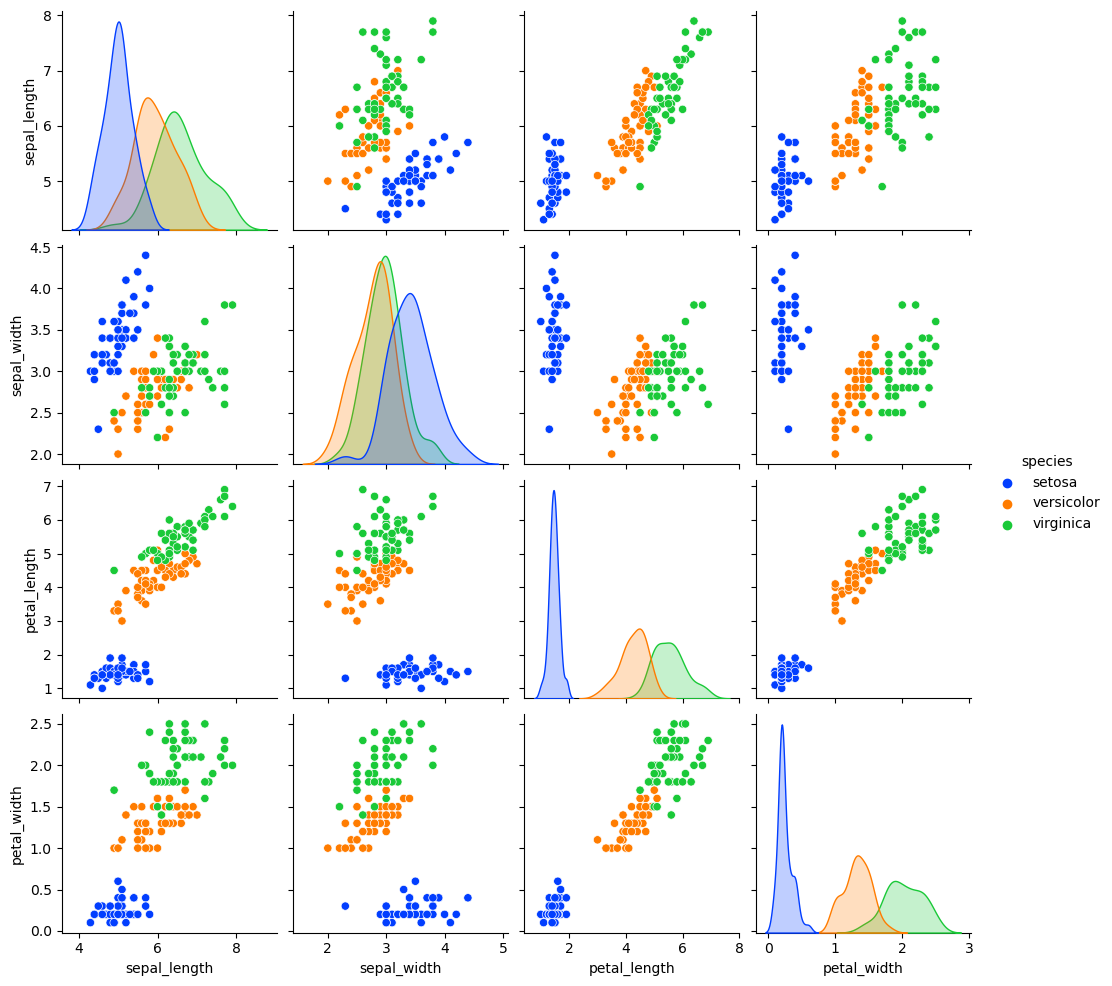

In [10]:
# Avec Seaborn, on peut construire le corrélogramme de ce dataset:
sns.pairplot(iris_df,hue='species',palette='bright')


<font color="RED" size="+1"><b>[Q]</b></font> Examiner ce corrélogramme et expliquer ce qu'il représente:
- pourquoi certains affichages représentent des points et d'autres affichages (lesquels?) représentent des courbes?

De plus, en examinant ce corrélogramme : 
- est-ce que le problème de classification des iris semble être un problème difficile ? Expliquez ?
- à votre avis, sans faire de calculs, quels sont les 2 attributs qui semblent le plus discrimant pour reconnaître la valeur de la classe ?

<i>Rajouter ci-dessous une boîte "markdown" pour donner vos réponses.</i>

Sur la diagonale on voit la distribution des données de chaque label (que l'on indique avec l'argument 'hue') selon une seule attribut, car l'attribut des abscisses et ordonnées serait le même.

Sinon, les deux attributs sont mesurés sur les axes et seaborn crée un scatterplot avec une couleur différente pour chaque label.

In [11]:
# Passer du dataframe à des arrays:
iris_desc = np.array(iris_df[['sepal_length', 'sepal_width', 'petal_length', 'petal_width']])
iris_label = np.array(iris_df['species'])

# obtenir les noms des colonnes :
iris_noms = ['sepal_length', 'sepal_width', 'petal_length', 'petal_width']

print("Noms des features: ",iris_noms)

Noms des features:  ['sepal_length', 'sepal_width', 'petal_length', 'petal_width']


In [12]:
# Les 6 premières lignes du dataset:
iris_desc[0:6,:]

array([[5.1, 3.5, 1.4, 0.2],
       [4.9, 3. , 1.4, 0.2],
       [4.7, 3.2, 1.3, 0.2],
       [4.6, 3.1, 1.5, 0.2],
       [5. , 3.6, 1.4, 0.2],
       [5.4, 3.9, 1.7, 0.4]])

In [13]:
iris_label[0:6]

array(['setosa', 'setosa', 'setosa', 'setosa', 'setosa', 'setosa'],
      dtype=object)

In [14]:
# Exemple : fleurs dont la 'sepal_length' vaut 6.3
iris_label[iris_desc[:,0] == 6.3]

array(['versicolor', 'versicolor', 'versicolor', 'virginica', 'virginica',
       'virginica', 'virginica', 'virginica', 'virginica'], dtype=object)

In [15]:
# Rappel:  utilisation de la fonction numpy `unique`

valeurs, nb_fois = np.unique(iris_label,return_counts=True)

print("Valeurs différentes dans l'array           : ",valeurs)
print("Décompte de chaque valeur (respectivement) : ",nb_fois)

Valeurs différentes dans l'array           :  ['setosa' 'versicolor' 'virginica']
Décompte de chaque valeur (respectivement) :  [50 50 50]


<font color="RED" size="+1"><b>[Q]</b></font> Vérifier que la fonction <code>classe_majoritaire</code> écrite lors du TME 6 est bien installée dans votre librairie.



In [16]:
# Vérification sur nos données:
cl.classe_majoritaire(iris_label)

'setosa'

In [17]:
# Vérification que la fonction Shannon est ok:
print("H([1]) = ", cl.shannon([1]))
print("H([1,0]) = ", cl.shannon([1, 0]))
print("H([0.25, 0.25, 0.25, 0.25]) = ", cl.shannon([0.25, 0.25, 0.25, 0.25]))
print("H([0.5, 0.5]) = ", cl.shannon([0.5, 0.5]))
print("H([0.5, 0.5, 0.0, 0.0]) = ", cl.shannon([0.5, 0.5, 0.0, 0.0]))
print("H([0.4, 0.4, 0.1, 0.1]) = ", cl.shannon([0.4, 0.4, 0.1, 0.1]))


H([1]) =  0
H([1,0]) =  -0.0
H([0.25, 0.25, 0.25, 0.25]) =  1.0
H([0.5, 0.5]) =  1.0
H([0.5, 0.5, 0.0, 0.0]) =  0.5
H([0.4, 0.4, 0.1, 0.1]) =  0.8609640474436812


<font color="RED" size="+1">**[Q]**</font> Vérifier que le calcul d'<code>entropie</code> est aussi ok.

In [18]:
# Exemple sur nos données :
cl.entropie(iris_label)

1.0

### Discrétisation des attributs numériques

<div class="alert alert-block alert-success">
    
**Discrétiser** un attribut numérique consiste en trouver un seuil de coupure dans son ensemble de valeurs après les avoir ordonnées. 

    Par exemple, soit l'attribut Age contenant les valeurs 12, 15, 17, 20, 35, 37, 40. On discrétise cet 
    attribut en 2 intervalles en prenant un seuil, par exemple, la valeur 30: cela permet de séparer d'un 
    côté les valeurs inférieures ou égales à 30, et de l'autre les valeurs strictement supérieures à 30.

En apprentissage, lors que l'on doit discrétiser un attribut numérique, on utilise la distribution des classes sur cet ensemble de valeurs: le seuil de discrétisation est choisi afin d'optimiser la distribution des classes des exemples qui se trouvent de chaque côté du seuil. 
    
    Par exemple, avec l'attribut Age donné plus haut, soit la distribution suivante des classes +1 et -1:
    -1, -1, -1, +1, +1, +1, +1
    qui correspond à : la valeur d'âge 17 est associée à la classe -1, la valeur 18 est associée à 
    la classe -1, etc.
</div>    


<div class="alert alert-block alert-warning">
Considérons la base d'apprentissage suivante qui donne pour une valeur d'âge d'une personne, la classe +1 si la personne peut voter, ou la classe -1 si elle ne peut pas voter:

<table>
<tr>    
    <th>Age:</th><td>12</td><td>15</td><td>17</td><td>20</td><td>35</td><td>37</td><td>40</td>
</tr>
<tr>    
    <th>peut voter:</th><td>-1</td><td>-1</td><td>-1</td><td>+1</td><td>+1</td><td>+1</td><td>+1</td>
</tr>    
</table>    

Lors de la construction d'un arbre de décision, on souhaite discrétiser l'attribut Age en utilisant la distribution des classes: on veut un seuil de coupure dans l'ensemble des valeurs d'âges qui soit le plus en adéquation avec la classe.

Pour les valeurs dans notre table, on peut dire que prendre un seuil de coupure qui soit une valeur d'âge comprise entre 17 et 20 est intéressant. Par exemple, si on choisit comme seuil la valeur 18.5 on obtient 2 intervalles:
- les âges inférieurs ou égaux à 18.5 qui sont associés à la classe -1
- les âges strictement supérieurs à18.5 qui sont associés à la classe +1

On dit que le seuil 18.5 permet d'obtenir une discrétisation optimale pour la classe.
</div>

<div class="alert alert-block alert-success">

Mais tous les problèmes de discrétisation ne sont pas si simple, il est parfois difficile de voir un seuil de discrétisation optimal.    
    
Pour faire cela de façon automatique, on utile une mesure comme l'entropie de Shannon et on applique l'algorithme de discrétisation suivant:
1. on choisit un seuil dans l'ensemble des valeurs numériques: ce seuil sépare les classes en 2 sous-ensembles, celui des classes des valeurs inférieures ou égales au seuil, et celui des classes des valeurs strictement supérieures au seuil. Cela fournit donc un distribution des classes sur ces 2 ensembles.
2. on calcule le désordre des classes associées aux exemples de chaque côté du seuil et on agrège les 2 valeurs de désordre obtenues pour déterminer la qualité de la coupure.


Soit $X$ un ensemble d'exemples, et soit $A$ un attribut que l'on souhaite discrétiser. Pour cela, on constitue l'ensemble des valeurs prises par les exemples de $X$ pour l'attribut $A$. Soit $A_X$ cet ensemble de valeurs.

La discrétisation de $A_X$ s'effectue par les étapes suivantes:
- Etape 1: ordonner de façon croissante les valeurs de $A_X$;
- Etape 2: regarder tous les seuils possibles de coupure entre 2 valeurs consécutives de $A_X$ (on prend comme seuil de coupure la valeur médiane entre ces 2 valeurs). Chaque seuil trouvé crée 2 intervalles qui générent 2 sous-ensembles de $X$: l'ensemble $X_1$ des exemples dont la valeur pour $A$ et inférieure ou égale au seuil, et l'ensemble $X_2$ des exemples dont la valeur pour $A$ et supérieure au seuil. On détermine la qualité du seuil par la mesure présentée ci-dessous et on note $Q(seuil)$ sa valeur.

La meilleure coupure pour discrétiser $A_X$ est celle qui minimise la valeur $Q(seuil)$.

La mesure $Q(seuil)$ se calcule de la façon suivante:
- on calcule l'entropie de Shannon $H_S(X_1)$ de la distribution des classes dans $X_1$
- on calcule l'entropie de Shannon $H_S(X_2)$ de la distribution des classes dans $X_2$
- la valeur de $Q(seuil)$ est alors:
$Q(seuil)= \frac{|X_1|}{|X_1|+|X_2|}H_S(X_1) + \frac{|X_2|}{|X_1|+|X_2|}H_S(X_2)$
où |.| désigne le cardinal de l'ensemble considéré (ie. son nombre de valeurs).
</div>

<div class="alert alert-block alert-warning">
Par exemple, soit $X=\{17, 18, 20, 27, 35, 37, 40\}$, chaque valeur étant associées aux classes +1, +1, -1, -1, +1, +1, -1 respectivement. Un seuil de coupure possible est $31$ ($31 = \frac{27+35}{2}$). Ce seuil coupe $X$ en $X_1=\{17, 18, 20, 27\}$ et $X_2=\{35, 37, 40\}$.

- pour $X_1$, la probabilité de chaque classe est: $p(+1)= 0.5$ et $p(-1)=0.5$ donc, $H_S(X_1)=1$;
- pour $X_2$, la probabilité de chaque classe est: $p(+1)= \frac{2}{3}$ et $p(-1)=\frac{1}{3}$ donc, $H_S(X_2)=0.9182958340544896$;
- on a donc: $$Q(seuil=31) = \frac{4}{7} H_S(X_1) + \frac{3}{7} H_S(X_2);$$
soit $Q(seuil=31) = 0.9182958340544896$
</div>


<div class="alert alert-block alert-warning">

Ci-dessous, la méthode <code>discretise</code> qui permet de trouver le seuil de coupure optimal dans un ensemble de valeurs associées à des classes (labels).
    
</div>

In [14]:
def discretise(m_desc, m_class, num_col):
    """ input:
            - m_desc : (np.array) matrice des descriptions toutes numériques
            - m_class : (np.array) matrice des classes (correspondant à m_desc)
            - num_col : (int) numéro de colonne de m_desc à considérer
            - nb_classes : (int) nombre initial de labels dans le dataset (défaut: 2)
        output: tuple : ((seuil_trouve, entropie), (liste_coupures,liste_entropies))
            -> seuil_trouve (float): meilleur seuil trouvé
            -> entropie (float): entropie du seuil trouvé (celle qui minimise)
            -> liste_coupures (List[float]): la liste des valeurs seuils qui ont été regardées
            -> liste_entropies (List[float]): la liste des entropies correspondantes aux seuils regardés
            (les 2 listes correspondent et sont donc de même taille)
            REMARQUE: dans le cas où il y a moins de 2 valeurs d'attribut dans m_desc, aucune discrétisation
            n'est possible, on rend donc ((None , +Inf), ([],[])) dans ce cas            
    """
    # Liste triée des valeurs différentes présentes dans m_desc:
    l_valeurs = np.unique(m_desc[:,num_col])
    
    # Si on a moins de 2 valeurs, pas la peine de discrétiser:
    if (len(l_valeurs) < 2):
        return ((None, float('Inf')), ([],[]))
    
    # Initialisation
    best_seuil = None
    best_entropie = float('Inf')
    
    # pour voir ce qui se passe, on va sauver les entropies trouvées et les points de coupures:
    liste_entropies = []
    liste_coupures = []
    
    nb_exemples = len(m_class)
    
    for v in l_valeurs:
        cl_inf = m_class[m_desc[:,num_col]<=v]
        cl_sup = m_class[m_desc[:,num_col]>v]
        nb_inf = len(cl_inf)
        nb_sup = len(cl_sup)
        
        # calcul de l'entropie de la coupure
        val_entropie_inf = cl.entropie(cl_inf) # entropie de l'ensemble des inf
        val_entropie_sup = cl.entropie(cl_sup) # entropie de l'ensemble des sup
        
        val_entropie = (nb_inf / float(nb_exemples)) * val_entropie_inf \
                       + (nb_sup / float(nb_exemples)) * val_entropie_sup
        
        # Ajout de la valeur trouvée pour retourner l'ensemble des entropies trouvées:
        liste_coupures.append(v)
        liste_entropies.append(val_entropie)
        
        # si cette coupure minimise l'entropie, on mémorise ce seuil et son entropie:
        if (best_entropie > val_entropie):
            best_entropie = val_entropie
            best_seuil = v
    
    return (best_seuil, best_entropie), (liste_coupures,liste_entropies)

Pour  sepal_length
Seuil de coupure trouvé: 5.500 et son entropie: 0.64843


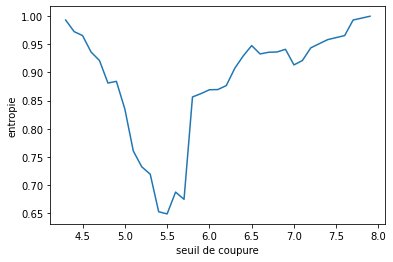

In [15]:
# Exemple d'utilisation:
numero_colonne = 0
resultat, liste_vals = discretise(iris_desc,iris_label,numero_colonne)

print("Pour ", iris_noms[numero_colonne])
print(f"Seuil de coupure trouvé: {resultat[0]:1.3f} et son entropie: {resultat[1]:1.5f}" )

# affichage de la variation de l'entropie en fonction du choix du seuil:
X,Y = liste_vals
plt.plot(X,Y)
plt.ylabel('entropie')
plt.xlabel('seuil de coupure')
plt.show()

Pour  sepal_width
Seuil de coupure trouvé: 3.300 et son entropie: 0.82137


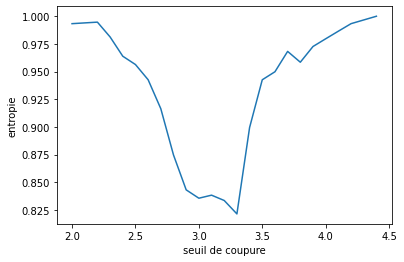

In [16]:
# Autre exemple:
numero_colonne = 1

resultat, liste_vals = discretise(iris_desc,iris_label,numero_colonne)

print("Pour ", iris_noms[numero_colonne])
print(f"Seuil de coupure trouvé: {resultat[0]:1.3f} et son entropie: {resultat[1]:1.5f}" )

# affichage de la variation de l'entropie en fonction du choix du seuil:
X,Y = liste_vals
plt.plot(X,Y)
plt.ylabel('entropie')
plt.xlabel('seuil de coupure')
plt.show()

Pour  petal_length
Seuil de coupure trouvé: 1.700 et son entropie: 0.48036


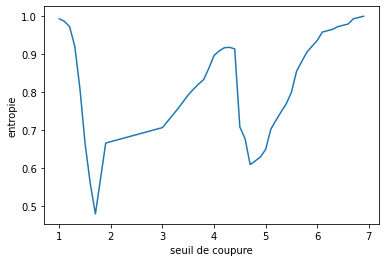

In [17]:
# Autre exemple:
numero_colonne = 2

resultat, liste_vals = discretise(iris_desc,iris_label,numero_colonne)

print("Pour ", iris_noms[numero_colonne])
print(f"Seuil de coupure trouvé: {resultat[0]:1.3f} et son entropie: {resultat[1]:1.5f}" )

# affichage de la variation de l'entropie en fonction du choix du seuil:
X,Y = liste_vals
plt.plot(X,Y)
plt.ylabel('entropie')
plt.xlabel('seuil de coupure')
plt.show()

Pour  petal_width
Seuil de coupure trouvé: 0.500 et son entropie: 0.45466


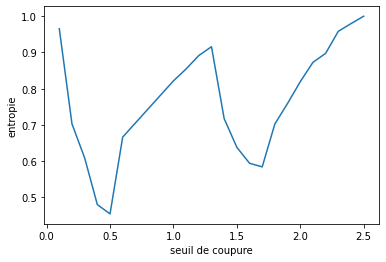

In [18]:
# Autre exemple:
numero_colonne = 3

resultat, liste_vals = discretise(iris_desc,iris_label,numero_colonne)

print("Pour ", iris_noms[numero_colonne])
print(f"Seuil de coupure trouvé: {resultat[0]:1.3f} et son entropie: {resultat[1]:1.5f}" )

# affichage de la variation de l'entropie en fonction du choix du seuil:
X,Y = liste_vals
plt.plot(X,Y)
plt.ylabel('entropie')
plt.xlabel('seuil de coupure')
plt.show()

<div class="alert alert-block alert-warning">
Une fois un seuil de coupure $s$ trouvé sur un attribut $n$, on partitionne la base d'apprentissage en 2 ensembles:
- l'ensemble des exemples qui ont une valeur inférieure ou égale à $s$ pour l'attribut $n$
- l'ensemble des exemples qui ont une valeur strictement supérieure à $s$ pour l'attribut $n$
</div>    


<font color="RED" size="+1"><b>[Q]</b></font> Ecrire la fonction <code>partionne</code> qui prend en argument deux numpy array $m_{desc}$ et $m_{class}$ qui représentent une base d'apprentissage, un numéro de colonne $n$ et une valeur de seuil $s$ et qui rend un tuple composé  de 2 tuples de numpy arrays:
- le premier tuple est composé de l'ensemble des descriptions de tous les exemples de $T$ qui ont une valeur pour la colonne $n$ inférieure ou égale à $s$ et l'ensemble de leur classe;
- le second tuple est composé de l'ensemble des descriptions de tous les exemples de $T$ qui ont une valeur pour la colonne $n$ strictement supérieure à $s$ et l'ensemble de leur classe;


In [1]:
def partitionne(m_desc,m_class,n,s):
    """ input:
            - m_desc : (np.array) matrice des descriptions toutes numériques
            - m_class : (np.array) matrice des classes (correspondant à m_desc)
            - n : (int) numéro de colonne de m_desc
            - s : (float) seuil pour le critère d'arrêt
        Hypothèse: m_desc peut être partitionné ! (il contient au moins 2 valeurs différentes)
        output: un tuple composé de 2 tuples
    """

    #############
    # COMPLETER CETTE PARTIE 
    #
    #############

In [20]:
# Exemple d'utilisation :

# Recherche point de coupure :
numero_colonne = 3
resultat, liste_vals = discretise(iris_desc,iris_label,numero_colonne)
print(f"Seuil de coupure trouvé: {resultat[0]:1.3f} et son entropie: {resultat[1]:1.5f}" )

# partitionnement :
((left_data,left_class), (right_data,right_class)) = partitionne(iris_desc,iris_label, numero_colonne,resultat[0])

print("Nombre d'exemples à gauche : ", len(left_class), " Nombre d'exemples à droite : ", len(right_class) )

Seuil de coupure trouvé: 0.500 et son entropie: 0.45466
Nombre d'exemples à gauche :  49  Nombre d'exemples à droite :  101


In [21]:
# Les 10 premières lignes :
left_data[0:10,:]

array([[5.1, 3.5, 1.4, 0.2],
       [4.9, 3. , 1.4, 0.2],
       [4.7, 3.2, 1.3, 0.2],
       [4.6, 3.1, 1.5, 0.2],
       [5. , 3.6, 1.4, 0.2],
       [5.4, 3.9, 1.7, 0.4],
       [4.6, 3.4, 1.4, 0.3],
       [5. , 3.4, 1.5, 0.2],
       [4.4, 2.9, 1.4, 0.2],
       [4.9, 3.1, 1.5, 0.1]])

## Arbres de décision numériques

Afin de représenter des arbres de décision numériques, on créé une nouvelle classe qui permet de définir des noeuds internes de l'arbre associés à des attributs numériques.

<b>Remarque:</b> on se place dans le cas où l'arbre de décision final ne contiendra que des noeuds numériques. Il n'y a donc pas à prévoir de noeud catégoriel dans cet arbre.

<font color="RED" size="+1"><b>[Q]</b></font> Compléter la classe suivante pour pouvoir classifier avec un noeud numérique.

In [ ]:
import graphviz as gv

class NoeudNumerique:
    """ Classe pour représenter des noeuds numériques d'un arbre de décision
    """
    def __init__(self, num_att=-1, nom=''):
        """ Constructeur: il prend en argument
            - num_att (int) : le numéro de l'attribut auquel il se rapporte: de 0 à ...
              si le noeud se rapporte à la classe, le numéro est -1, on n'a pas besoin
              de le préciser
            - nom (str) : une chaîne de caractères donnant le nom de l'attribut si
              il est connu (sinon, on ne met rien et le nom sera donné de façon 
              générique: "att_Numéro")
        """
        self.attribut = num_att    # numéro de l'attribut
        if (nom == ''):            # son nom si connu
            self.nom_attribut = 'att_'+str(num_att)
        else:
            self.nom_attribut = nom 
        self.seuil = None          # seuil de coupure pour ce noeud
        self.Les_fils = None       # aucun fils à la création, ils seront ajoutés
        self.classe   = None       # valeur de la classe si c'est une feuille
        
    def est_feuille(self):
        """ rend True si l'arbre est une feuille 
            c'est une feuille s'il n'a aucun fils
        """
        return self.Les_fils == None
    
    def ajoute_fils(self, val_seuil, fils_inf, fils_sup):
        """ val_seuil : valeur du seuil de coupure
            fils_inf : fils à atteindre pour les valeurs inférieures ou égales à seuil
            fils_sup : fils à atteindre pour les valeurs supérieures à seuil
        """
        if self.Les_fils == None:
            self.Les_fils = dict()            
        self.seuil = val_seuil
        self.Les_fils['inf'] = fils_inf
        self.Les_fils['sup'] = fils_sup        
    
    def ajoute_feuille(self,classe):
        """ classe: valeur de la classe
            Ce noeud devient un noeud feuille
        """
        self.classe    = classe
        self.Les_fils  = None   # normalement, pas obligatoire ici, c'est pour être sûr
        
    def classifie(self, exemple):
        """ exemple : numpy.array
            rend la classe de l'exemple (pour nous, soit +1, soit -1 en général)
            on rend la valeur 0 si l'exemple ne peut pas être classé (cf. les questions
            posées en fin de ce notebook)
        """
        #############
        # COMPLETER CETTE PARTIE 
        #
        #############
        
    
    def to_graph(self, g, prefixe='A'):
        """ construit une représentation de l'arbre pour pouvoir l'afficher graphiquement
            Cette fonction ne nous intéressera pas plus que ça, elle ne sera donc 
            pas expliquée            
        """
        if self.est_feuille():
            g.node(prefixe,str(self.classe),shape='box')
        else:
            g.node(prefixe, str(self.nom_attribut))
            self.Les_fils['inf'].to_graph(g,prefixe+"g")
            self.Les_fils['sup'].to_graph(g,prefixe+"d")
            g.edge(prefixe,prefixe+"g", '<='+ str(self.seuil))
            g.edge(prefixe,prefixe+"d", '>'+ str(self.seuil))                
        return g


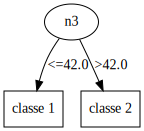

In [23]:
# Exemple d'utilisation: 
un_arbre= NoeudNumerique(nom='n1')
un_arbre.ajoute_feuille("classe 1")
un_arbre.est_feuille()
un_arbre1 = NoeudNumerique(nom="n2")
un_arbre1.ajoute_feuille("classe 2")
un_arbre2 = NoeudNumerique(nom="n3")
un_arbre2.ajoute_fils(42.0,un_arbre,un_arbre1)

gtree = gv.Digraph(format='png')
un_arbre2.to_graph(gtree)

<font color="RED" size="+1"><b>[Q]</b></font> En utilisant la fonction `discretise`, écrire la fonction `construit_AD_num` (en utilisant la version catégorielle réalisée lors de la séance précédente) afin de pouvoir construire des arbres de décision avec des valeurs numériques.
Les attributs numériques seront discrétisés en 2 valeurs catégorielles.

In [24]:
# ------------------------ (VERSION ENSEIGNANT)

def construit_AD_num(X,Y,epsilon,LNoms = []):
    """ X,Y : dataset
        epsilon : seuil d'entropie pour le critère d'arrêt 
        LNoms : liste des noms de features (colonnes) de description 
    """
    
    # dimensions de X:
    (nb_lig, nb_col) = X.shape
    
    entropie_classe = cl.entropie(Y)
    
    if (entropie_classe <= epsilon) or  (nb_lig <=1):
        # ARRET : on crée une feuille
        noeud = NoeudNumerique(-1,"Label")
        noeud.ajoute_feuille(cl.classe_majoritaire(Y))
    else:
        gain_max = float('-Inf')  # meilleur gain trouvé (initalisé à -infinie)
        i_best = -1               # numéro du meilleur attribut (init à -1 (aucun))
        Xbest_set = None
        
        #############
        
        # COMPLETER CETTE PARTIE : ELLE DOIT PERMETTRE D'OBTENIR DANS
        # i_best : le numéro de l'attribut qui maximise le gain d'information.  En cas d'égalité,
        #          le premier rencontré est choisi.
        # gain_max : la plus grande valeur de gain d'information trouvée.
        # Xbest_tuple : le tuple rendu par partionne() pour le meilleur attribut trouvé
        # Xbest_seuil : le seuil de partitionnement associé au meilleur attribut
        #
        # Remarque : attention, la fonction discretise() peut renvoyer un tuple contenant
        # None (pas de partitionnement possible)n dans ce cas, on considèrera que le
        # résultat d'un partitionnement est alors ((X,Y),(None,None))
        
        
        ############
        if (gain_max != float('-Inf')):
            if len(LNoms)>0:  # si on a des noms de features
                noeud = NoeudNumerique(i_best,LNoms[i_best]) 
            else:
                noeud = NoeudNumerique(i_best)
            ((left_data,left_class), (right_data,right_class)) = Xbest_tuple
            noeud.ajoute_fils( Xbest_seuil, \
                              construit_AD_num(left_data,left_class, epsilon, LNoms), \
                              construit_AD_num(right_data,right_class, epsilon, LNoms) )
        else: # aucun attribut n'a pu améliorer le gain d'information
              # ARRET : on crée une feuille
            noeud = NoeudNumerique(-1,"Label")
            noeud.ajoute_feuille(cl.classe_majoritaire(Y))
        
    return noeud

In [25]:
class ClassifierArbreNumerique(cl.Classifier):
    """ Classe pour représenter un classifieur par arbre de décision numérique
    """
    
    def __init__(self, input_dimension, epsilon, LNoms=[]):
        """ Constructeur
            Argument:
                - intput_dimension (int) : dimension de la description des exemples
                - epsilon (float) : paramètre de l'algorithme (cf. explications précédentes)
                - LNoms : Liste des noms de dimensions (si connues)
            Hypothèse : input_dimension > 0
        """
        self.dimension = input_dimension
        self.epsilon = epsilon
        self.LNoms = LNoms
        # l'arbre est manipulé par sa racine qui sera un Noeud
        self.racine = None
        
    def toString(self):
        """  -> str
            rend le nom du classifieur avec ses paramètres
        """
        return 'ClassifierArbreDecision ['+str(self.dimension) + '] eps='+str(self.epsilon)
        
    def train(self, desc_set, label_set):
        """ Permet d'entrainer le modele sur l'ensemble donné
            desc_set: ndarray avec des descriptions
            label_set: ndarray avec les labels correspondants
            Hypothèse: desc_set et label_set ont le même nombre de lignes
        """        
        self.racine = construit_AD_num(desc_set,label_set,self.epsilon,self.LNoms)
    
    def score(self,x):
        """ rend le score de prédiction sur x (valeur réelle)
            x: une description
        """
        # cette méthode ne fait rien dans notre implémentation :
        pass
    
    def predict(self, x):
        """ x (array): une description d'exemple
            rend la prediction sur x             
        """
        return self.racine.classifie(x)

    def accuracy(self, desc_set, label_set):  # Version propre à aux arbres
        """ Permet de calculer la qualité du système sur un dataset donné
            desc_set: ndarray avec des descriptions
            label_set: ndarray avec les labels correspondants
            Hypothèse: desc_set et label_set ont le même nombre de lignes
        """
        nb_ok=0
        for i in range(desc_set.shape[0]):
            if self.predict(desc_set[i,:]) == label_set[i]:
                nb_ok=nb_ok+1
        acc=nb_ok/(desc_set.shape[0] * 1.0)
        return acc

    def affiche(self,GTree):
        """ affichage de l'arbre sous forme graphique
            Cette fonction modifie GTree par effet de bord
        """
        self.racine.to_graph(GTree)
# ---------------------------


In [26]:
iris_noms

['sepal_length', 'sepal_width', 'petal_length', 'petal_width']

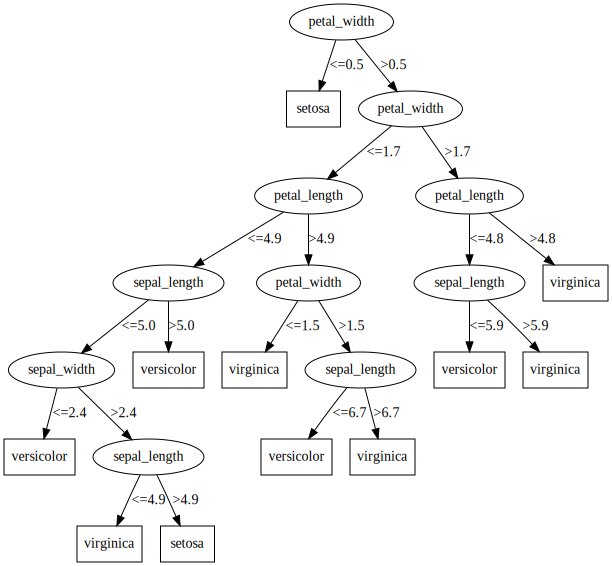

In [27]:
# Initialiation d'un arbre pour le dataset Iris:
arbre_iris = ClassifierArbreNumerique(len(iris_noms), 0.0, iris_noms)

# Construction de l'arbre de décision à partir du dataset Iris
arbre_iris.train(iris_desc,iris_label)

# Construction de la représentation graphique (affichage)
graphe_arbre_iris = gv.Digraph(format='png')
arbre_iris.affiche(graphe_arbre_iris)

# Affichage du graphe obtenu:
graphe_arbre_iris

In [28]:
# mesure du taux de bonne classification
arbre_iris.accuracy(iris_desc,iris_label)

1.0

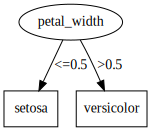

In [29]:
# Nouvel essai avec un seuil d'entropie élevé:
# Initialiation d'un arbre pour le dataset Elections:
arbre_iris2 = ClassifierArbreNumerique(len(iris_noms),0.75, iris_noms)

# Construction de l'arbre de décision à partir du dataset Elections
arbre_iris2.train(iris_desc,iris_label)

# Construction de la représentation graphique (affichage)
graphe_arbre_iris2 = gv.Digraph(format='png')
arbre_iris2.affiche(graphe_arbre_iris2)

# Affichage du graphe obtenu:
graphe_arbre_iris2

In [30]:
# mesure du taux de bonne classification
arbre_iris2.accuracy(iris_desc,iris_label)

0.66

<font color="RED" size="+1"><b>[Q]</b></font> Tester cet algorithme en effectuant une validation croisée sur les données des iris (en prenant $0.0$ comme seuil d'entropie).

In [31]:
print("Remarque: j'ai mis des affichage dans la fonction validation croisée afin de montrer ce qui se passe.\n")

# ################### A COMPLETER 



# ################### 
       
print("\nValidation croisée sur les iris avec comme seuil ",0.0)
print("Perf obtenues : ",res_all)
print(f'\nAccuracy moyenne: {res_moy:.3f}\técart type: {res_sd:.3f}')

Remarque: j'ai mis des affichage dans la fonction validation croisée afin de montrer ce qui se passe.

------ début affichage validation croisée (optionnel)
0 : taille app.=  135 taille test=  15 Accuracy:  1.0
1 : taille app.=  135 taille test=  15 Accuracy:  0.9333333333333333
2 : taille app.=  135 taille test=  15 Accuracy:  1.0
3 : taille app.=  135 taille test=  15 Accuracy:  0.9333333333333333
4 : taille app.=  135 taille test=  15 Accuracy:  0.8666666666666667
5 : taille app.=  135 taille test=  15 Accuracy:  0.8666666666666667
6 : taille app.=  135 taille test=  15 Accuracy:  0.9333333333333333
7 : taille app.=  135 taille test=  15 Accuracy:  1.0
8 : taille app.=  135 taille test=  15 Accuracy:  0.9333333333333333
9 : taille app.=  135 taille test=  15 Accuracy:  1.0
------ fin affichage validation croisée

Validation croisée sur les iris avec comme seuil  0.0
Perf obtenues :  [1.0, 0.9333333333333333, 1.0, 0.9333333333333333, 0.8666666666666667, 0.8666666666666667, 0.93333333

<font color="RED" size="+1"><b>[Q]</b></font> Etudier la variation du taux de bonne classification lorsque l'on fait varier le seuil d'entropie utilisé pour l'apprentissage. Tracer ensuite la courbe de l'accuracy moyenne (incluant son écart type) quand le seuil d'entropie varie.

In [32]:
# ################### A COMPLETER 



# ################### 


run  0: seuil d'entropie = 0.000 accuracy moyenne: 0.947 écart type: 0.947
run  1: seuil d'entropie = 0.101 accuracy moyenne: 0.947 écart type: 0.947
run  2: seuil d'entropie = 0.202 accuracy moyenne: 0.947 écart type: 0.947
run  3: seuil d'entropie = 0.303 accuracy moyenne: 0.947 écart type: 0.947
run  4: seuil d'entropie = 0.404 accuracy moyenne: 0.940 écart type: 0.940
run  5: seuil d'entropie = 0.505 accuracy moyenne: 0.940 écart type: 0.940
run  6: seuil d'entropie = 0.606 accuracy moyenne: 0.940 écart type: 0.940
run  7: seuil d'entropie = 0.707 accuracy moyenne: 0.653 écart type: 0.653
run  8: seuil d'entropie = 0.808 accuracy moyenne: 0.653 écart type: 0.653
run  9: seuil d'entropie = 0.909 accuracy moyenne: 0.653 écart type: 0.653
run 10: seuil d'entropie = 1.010 accuracy moyenne: 0.333 écart type: 0.333


 Pour utiliser la fonction lineplot de seaborn, on doit mettre les résultats obtenus dans un dataframe :
- avec 2 colonnes: 'Entropie' et 'Accuracy'
- chaque ligne donne le résultat d'un taux de bonne classification obtenu dans la validation croisée pour une valeur de seuil d'entropie : il y a donc 10 lignes par seuil d'entropie, chaque ligne avec le résultat d'une étape de la validation croisée.

<font color="RED" size="+1"><b>[Q]</b></font> Construire le dataframe ainsi défini.

In [33]:
df_res = pd.DataFrame(columns=['Entropie', 'Accuracy'])

# ################### A COMPLETER 


# ################### 
# Le dataframe obtenu :
df_res

,Entropie,Accuracy
0,0.00,1.000000
1,0.00,0.933333
2,0.00,1.000000
3,0.00,0.933333
4,0.00,0.866667
...,...,...
105,1.01,0.333333
106,1.01,0.333333
107,1.01,0.333333
108,1.01,0.333333


L'affichage se fait avec la fonction `lineplot` de seaborn. 

**Remarque**: le calcul de la moyenne et de l'écart type pour une même valeur de seuil est géré par la fonction.

<Axes: xlabel='Entropie', ylabel='Accuracy'>

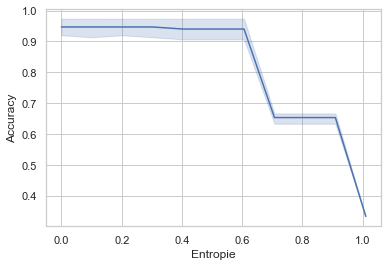

In [34]:
sns.set_theme(style="whitegrid")
sns.lineplot(x="Entropie", y="Accuracy", data=df_res)

<font color="RED" size="+1"><b>[Q]</b></font> Comparer les résultats obtenus avec la validation croisée avec les résultats obtenus avec les autres classifieurs (numériques) que vous avez implémentés.

<b>Remarque:</b> pour pouvoir utiliser les algorithmes précédents (knn, perceptron,...) vous devez utiliser leur version multi-classes (cf. TME 2).

## Pour aller plus loin... (optionnel)

La version générale d'un classifieur par arbre de décision doit pouvoir gérer des datasets contenant à la fois des variables numériques mais aussi catégorielles. En "fusionnant" les 2 classes `ClassifierArbreDecision` et `ClassifierArbreNumerique`, définissez une classe `ClassifierArbre` qui implémente cette version générale.